# `metrics.BinaryClassificationMetrics`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [3]:
from slickml.metrics import BinaryClassificationMetrics

help(BinaryClassificationMetrics)

Help on class BinaryClassificationMetrics in module slickml.metrics._classification:

class BinaryClassificationMetrics(builtins.object)
 |  BinaryClassificationMetrics(y_true: Union[List[int], numpy.ndarray, pandas.core.series.Series], y_pred_proba: Union[List[float], numpy.ndarray, pandas.core.series.Series], threshold: Optional[float] = 0.5, average_method: Optional[str] = 'binary', precision_digits: Optional[int] = 3, display_df: Optional[bool] = True) -> None
 |  
 |  BinaryClassificationMetrics calculates binary classification metrics in one place.
 |  
 |  Binary metrics are computed based on three methods for calculating the thresholds to binarize
 |  the prediction probabilities. Threshold computations including:
 |      1) Youden Index _[1].
 |      2) Maximizing Precision-Recall.
 |      3) Maximizing Sensitivity-Specificity.
 |  
 |  Parameters
 |  ----------
 |  y_true : Union[List[int], np.ndarray, pd.Series]
 |      List of ground truth values such as [0, 1] for binary p

### Example 1: `BinaryClassificationMetrics` for `breast-cancer` data set and a RandomForest model

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [5]:
bcm = BinaryClassificationMetrics(y_test, y_pred_proba)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.924000,0.911000,0.968000,0.975000,0.920000,0.963000,0.967000,0.941000,0.954000,0.928000,0.888000,103,55,9,4


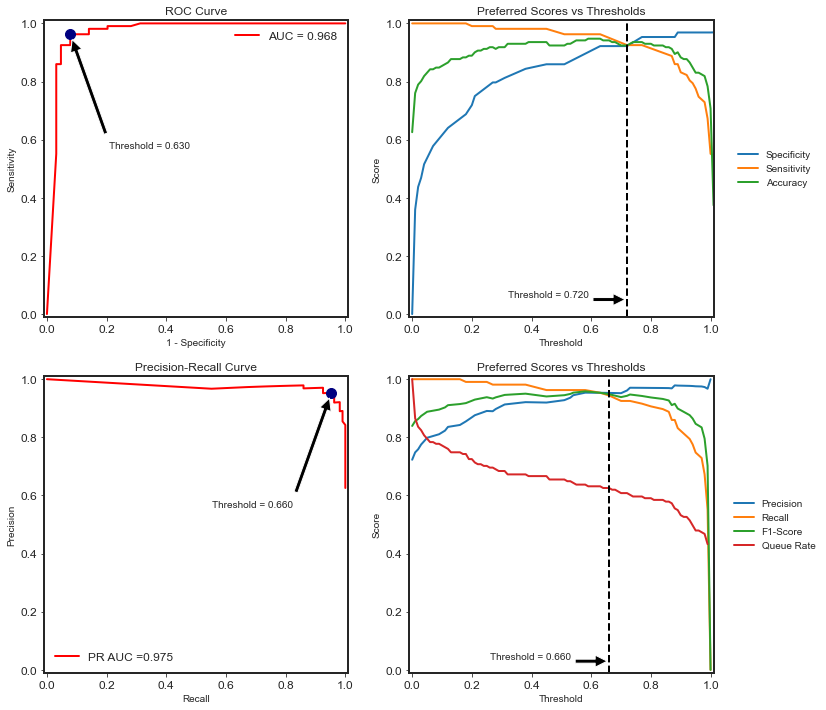

In [6]:
f = bcm.plot()

In [7]:
print(f"Accuracy = {bcm.accuracy_}")
print(f"Balanced Accuracy = {bcm.balanced_accuracy_}")
print(f"AUC ROC = {bcm.auc_roc_}")
print(f"AUC PR = {bcm.auc_pr_}")
print(f"Precision = {bcm.precision_}")
print(f"Recall = {bcm.recall_}")
print(f"F1-Score = {bcm.f1_}")
print(f"F2-Score = {bcm.f2_}")
print(f"F0.5-Score = {bcm.f05_}")
print(f"Average Precision = {bcm.average_precision_}")
print(f"Threat Score = {bcm.threat_score_}")
print(f"Metrics Dict = {bcm.metrics_dict_}")
print(f"Thresholds Dict = {bcm.thresholds_dict_}")

Accuracy = 0.9239766081871345
Balanced Accuracy = 0.9109959112149533
AUC ROC = 0.9684579439252337
AUC PR = 0.9751682328758773
Precision = 0.9196428571428571
Recall = 0.9626168224299065
F1-Score = 0.9406392694063926
F2-Score = 0.9537037037037037
F0.5-Score = 0.927927927927928
Average Precision = 0.9665598940893543
Threat Score = 0.8879310344827587
Metrics Dict = {'Accuracy': 0.924, 'Balanced Accuracy': 0.911, 'ROC AUC': 0.968, 'PR AUC': 0.975, 'Precision': 0.92, 'Recall': 0.963, 'F-1 Score': 0.941, 'F-2 Score': 0.954, 'F-0.50 Score': 0.928, 'Threat Score': 0.888, 'Average Precision': 0.967, 'TP': 103, 'TN': 55, 'FP': 9, 'FN': 4}
Thresholds Dict = {'Youden': 0.63, 'Sensitivity-Specificity': 0.72, 'Precision-Recall-F1': 0.66}


### You can also repeat the process for all `average_methods` and apply your desired formatting to your dataframe

In [8]:
import pandas as pd
import seaborn as sns
from IPython.display import display
from typing import Dict, Any, List
from matplotlib.colors import Colormap


def create_colormap() -> Colormap:
    """Creates a simple color map for pd.DataFrame format.

    Returns
    -------
    Colormap
    """
    return sns.light_palette(
        "blue",
        as_cmap=True,
    )


def create_df_styles() -> List[Dict[str, Any]]:
    """Returns simple css styles for pandas.DataFrames.

    Returns
    -------
    List[Dict[str, Any]]
    """
    th_props = [
        ("font-size", "12px"),
        ("text-align", "left"),
        ("font-weight", "bold"),
    ]
    td_props = [
        ("font-size", "12px"),
        ("text-align", "center"),
    ]
    return [
        dict(
            selector="th",
            props=th_props,
        ),
        dict(
            selector="td",
            props=td_props,
        ),
    ]


def create_metrics(
    bcm: BinaryClassificationMetrics,
) -> pd.DataFrame:
    """Creates all calculated metrics with all average methods and thresholds.

    Notes
    -----
    Possible average methods are "binary", "micro", "macro", and "weighted"
    Possible thresholds are "youden-index", "maximizing specificity-sensitivity", and
    "maximizing precision-recall".

    Parameters
    ----------
    bcm : BinaryClassificationMetrics
        An instance of binary classification metrics

    Returns
    -------
    pd.DataFrame
    """
    thresholds = bcm.thresholds_dict_
    methods = bcm.average_methods_

    frames = []
    for method in methods:
        for threshold in thresholds:
            m = BinaryClassificationMetrics(
                y_test,
                y_pred_proba,
                threshold=thresholds[threshold],
                average_method=method,
                display_df=False,
            )
            frames.append(m.metrics_df_)

    return pd.concat(frames)

In [9]:
cmap = create_colormap()
styles = create_df_styles()
df_to_show = create_metrics(bcm)

### Now, it is the time to `display` the results

In [10]:
display(
    df_to_show.style.background_gradient(
        cmap=cmap,
    ).set_table_styles(styles)
)

,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.630 | Average = Binary,0.947000,0.942000,0.968000,0.975000,0.954000,0.963000,0.967000,0.958000,0.961000,0.955000,0.920000,103,59,5,4
Threshold = 0.720 | Average = Binary,0.924000,0.924000,0.968000,0.975000,0.952000,0.925000,0.967000,0.938000,0.930000,0.946000,0.884000,99,59,5,8
Threshold = 0.660 | Average = Binary,0.942000,0.938000,0.968000,0.975000,0.953000,0.953000,0.967000,0.953000,0.953000,0.953000,0.911000,102,59,5,5
Threshold = 0.630 | Average = Weighted,0.947000,0.942000,0.968000,0.975000,0.947000,0.947000,0.967000,0.947000,0.947000,0.947000,0.901000,103,59,5,4
Threshold = 0.720 | Average = Weighted,0.924000,0.924000,0.968000,0.975000,0.925000,0.924000,0.967000,0.924000,0.924000,0.925000,0.860000,99,59,5,8
Threshold = 0.660 | Average = Weighted,0.942000,0.938000,0.968000,0.975000,0.942000,0.942000,0.967000,0.942000,0.942000,0.942000,0.890000,102,59,5,5
Threshold = 0.630 | Average = Macro,0.947000,0.942000,0.968000,0.975000,0.945000,0.942000,0.967000,0.944000,0.943000,0.945000,0.894000,103,59,5,4
Threshold = 0.720 | Average = Macro,0.924000,0.924000,0.968000,0.975000,0.916000,0.924000,0.967000,0.920000,0.922000,0.918000,0.852000,99,59,5,8
Threshold = 0.660 | Average = Macro,0.942000,0.938000,0.968000,0.975000,0.938000,0.938000,0.967000,0.938000,0.938000,0.938000,0.883000,102,59,5,5
Threshold = 0.630 | Average = Micro,0.947000,0.942000,0.968000,0.975000,0.947000,0.947000,0.967000,0.947000,0.947000,0.947000,0.920000,103,59,5,4


### More on `pandas.DataFrame` Styling can be found [here](https://pandas.pydata.org/pandas-docs/version/1.1/user_guide/style.html#:~:text=You%20can%20apply%20conditional%20formatting,styling%20is%20accomplished%20using%20CSS)

### Feel free to add your favorite `Example` via a `pull-request`.
### More details can be found in our [Contributing Document](https://github.com/slickml/slick-ml/blob/master/CONTRIBUTING.md).